In [2]:
import numpy as np
import pandas as pd
from sklearn import ensemble
from sklearn.linear_model import LinearRegression

from sklearn.cross_validation import cross_val_score
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn import manifold, decomposition, linear_model, ensemble, neighbors, cross_validation
import sklearn
from sklearn import pipeline, preprocessing, feature_extraction
import xgboost as xgb
from sklearn.metrics import f1_score
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import time
import datetime
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss, auc, roc_curve
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from scipy import sparse
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgbm

from sklearn.preprocessing import StandardScaler

%matplotlib inline
%pylab inline

/home/fao3864/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


In [3]:
X_train = pd.read_csv("data/train.csv")
X_test = pd.read_csv("data/test.csv")

In [16]:
X_train['question1'] = X_train['question1'].apply(lambda x: str(x))
X_train['question2'] = X_train['question2'].apply(lambda x: str(x))
X_test['question1'] = X_test['question1'].apply(lambda x: str(x))
X_test['question2'] = X_test['question2'].apply(lambda x: str(x))

X_train['question1'] = X_train['question1'].apply(lambda x: x.lower().split())
X_train['question2'] = X_train['question2'].apply(lambda x: x.lower().split())
X_test['question1'] = X_test['question1'].apply(lambda x: x.lower().split())
X_test['question2'] = X_test['question2'].apply(lambda x: x.lower().split())

In [28]:
t1 = X_train['question1'].apply(lambda x: len(x))
t2 = X_train['question2'].apply(lambda x: len(x))

In [31]:
print(t1.max())
print(t2.max())

125
237


In [32]:
X_train['diff_count'] = abs(t1 - t2)

/home/fao3864/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


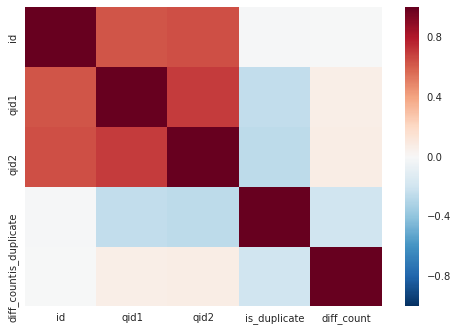

In [34]:
import seaborn as sns
CorrKoef = X_train.corr()
#pylab.figure(figsize=(50, 25))
sns.heatmap(CorrKoef, annot=False)

In [8]:
tmp = pd.DataFrame(X_test.groupby('question1')['test_id'].count())

In [11]:
tmp1 = pd.DataFrame(X_test.groupby('question2')['test_id'].count())

In [15]:
print(tmp.std())
print(tmp1.std())

test_id    1.486013
dtype: float64
test_id    1.476658
dtype: float64


In [38]:
[[1,2,2],[0,1,2]]

[[1, 2, 2], [0, 1, 2]]

In [39]:
tfidf = feature_extraction.text.TfidfTransformer()
tfidf.fit([[1,2,2],[0,1,2]])

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [49]:
t = tfidf.transform([1,0,2])

In [50]:
t.todense()

matrix([[ 0.57496187,  0.        ,  0.81818021]])

In [4]:
tmp = 0
mi = 1000000
arr = []
for i in X_train.index:
    if X_train.ix[i, 'qid2'] != X_train.ix[i, 'qid1'] + 1:
        tmp = i
        arr += [i]

In [5]:
arr

[264,
 326,
 353,
 647,
 704,
 729,
 1027,
 1081,
 1114,
 1332,
 1374,
 1426,
 1429,
 1467,
 1567,
 1638,
 1751,
 1780,
 1895,
 1912,
 1947,
 1983,
 2116,
 2173,
 2228,
 2249,
 2251,
 2290,
 2352,
 2383,
 2405,
 2424,
 2466,
 2499,
 2550,
 2653,
 2656,
 2662,
 2696,
 2702,
 2741,
 2746,
 2749,
 2777,
 2779,
 2827,
 2851,
 2881,
 2883,
 2958,
 2982,
 3026,
 3027,
 3112,
 3124,
 3160,
 3218,
 3254,
 3300,
 3390,
 3410,
 3448,
 3461,
 3475,
 3478,
 3503,
 3541,
 3618,
 3628,
 3635,
 3644,
 3695,
 3725,
 3812,
 3835,
 3931,
 3959,
 3969,
 3990,
 3992,
 4020,
 4031,
 4048,
 4060,
 4091,
 4100,
 4116,
 4117,
 4121,
 4148,
 4164,
 4165,
 4180,
 4194,
 4226,
 4231,
 4262,
 4333,
 4335,
 4340,
 4344,
 4363,
 4394,
 4438,
 4490,
 4496,
 4509,
 4531,
 4540,
 4598,
 4626,
 4671,
 4672,
 4700,
 4733,
 4764,
 4779,
 4782,
 4798,
 4815,
 4816,
 4852,
 4857,
 4860,
 4875,
 4898,
 4903,
 4915,
 4926,
 4936,
 4940,
 4945,
 4966,
 4984,
 4987,
 5002,
 5029,
 5033,
 5048,
 5052,
 5057,
 5065,
 5077,
 5079

In [23]:
len(arr)

184930

In [11]:
X_train.ix[:280, :]

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [11]:
len(arr)

184930

In [12]:
arr1 = []
for i in range(1, len(arr)):
    arr1 += [arr[i] - arr[i-1]]

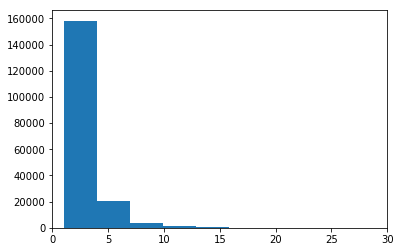

In [17]:
#plt.title(i)
#pylab.figure(figsize=(8, 6))
xlim(0, 30)
plt.hist(arr1, bins=100)
plt.show()

In [15]:
arr1

[62,
 27,
 294,
 57,
 25,
 298,
 54,
 33,
 218,
 42,
 52,
 3,
 38,
 100,
 71,
 113,
 29,
 115,
 17,
 35,
 36,
 133,
 57,
 55,
 21,
 2,
 39,
 62,
 31,
 22,
 19,
 42,
 33,
 51,
 103,
 3,
 6,
 34,
 6,
 39,
 5,
 3,
 28,
 2,
 48,
 24,
 30,
 2,
 75,
 24,
 44,
 1,
 85,
 12,
 36,
 58,
 36,
 46,
 90,
 20,
 38,
 13,
 14,
 3,
 25,
 38,
 77,
 10,
 7,
 9,
 51,
 30,
 87,
 23,
 96,
 28,
 10,
 21,
 2,
 28,
 11,
 17,
 12,
 31,
 9,
 16,
 1,
 4,
 27,
 16,
 1,
 15,
 14,
 32,
 5,
 31,
 71,
 2,
 5,
 4,
 19,
 31,
 44,
 52,
 6,
 13,
 22,
 9,
 58,
 28,
 45,
 1,
 28,
 33,
 31,
 15,
 3,
 16,
 17,
 1,
 36,
 5,
 3,
 15,
 23,
 5,
 12,
 11,
 10,
 4,
 5,
 21,
 18,
 3,
 15,
 27,
 4,
 15,
 4,
 5,
 8,
 12,
 2,
 17,
 5,
 34,
 1,
 17,
 26,
 6,
 10,
 1,
 7,
 1,
 16,
 8,
 7,
 26,
 12,
 26,
 24,
 8,
 4,
 25,
 29,
 4,
 8,
 14,
 2,
 6,
 2,
 14,
 14,
 22,
 13,
 4,
 1,
 16,
 12,
 1,
 4,
 22,
 19,
 2,
 2,
 7,
 34,
 1,
 1,
 70,
 27,
 4,
 12,
 7,
 17,
 4,
 4,
 11,
 7,
 13,
 2,
 17,
 8,
 44,
 6,
 34,
 2,
 5,
 3,
 6,
 8,
 4,
 8,
 5,
